In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


## 1.讀入 Fashion MNIST 數據集

In [6]:
#import tensorflow as tf

#### 終端機更新，就解除Error
https://stackoverflow.com/questions/51724309/attributeerror-module-tensorflow-has-no-attribute-name-scope-with-keras
* pip install --upgrade pip setuptools wheel
* pip install -I tensorflow
* pip install -I keras

In [7]:
# Error
import tensorflow as tf
import keras
from tensorflow.keras.datasets import fashion_mnist

Using TensorFlow backend.


In [8]:
# 法二(課本)
#fashion_mnist = keras.datasets.fashion_mnist

In [9]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [10]:
x_train.shape #60000張圖片，每張是28x28

(60000, 28, 28)

In [11]:
x_train.dtype

dtype('uint8')

## 2.查看數據集內容

In [12]:
n = 1996
print("It's ", y_train[n])

It's  1


In [13]:
# 把數字轉換成對應的類別
class_names = ['T-shirt/top', "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

It's  Trouser


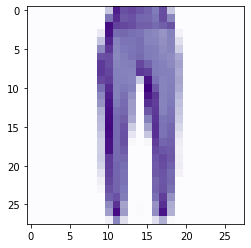

In [14]:
n = 1996
print("It's ", class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Purples')

### replace
* replace=True: 可以从a 中反复选取同一个元素。
* replace=False: a 中同一个元素只能被选取一次。

### subplot
subplot(2, 3, 3)=subplot(233)

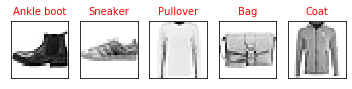

In [15]:
import random
pick = np.random.choice(60000, 5, replace=False) # 60000個裡面隨機選 5個出來

for i in range(5):
    n = pick[i]
    #plt.figure(figsize = (20,20))
    ax = plt.subplot(151+i) #151代表一列五行，i代表從左邊數來第幾個
    ax.set_xticks([]) #橫坐標為空值
    ax.set_yticks([]) #縱坐標為空值
    ax.set_title(class_names[y_train[n]], fontsize=10, color='r')
    plt.imshow(x_train[n], cmap='Greys')

## 3.整理資料

In [16]:
x_train
x_test[1996]
# 所以不用壓縮? Nope

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15,  22,
          0,   0,   0,   0,  34,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 161, 205, 196,
        164, 209, 149, 164, 189, 130,  24,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 144, 195, 188,
        189, 211, 199, 186, 181, 170,  37,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 124, 185, 209,
        191, 167, 167, 171, 208, 191,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 164, 229, 219,
        231, 214, 220, 211, 221, 191,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 196, 229, 211,
        219, 209, 217, 213, 207, 205,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [17]:
x_train = x_train/255
x_test = x_test/255

In [18]:
x_train[1996]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.54545455, 4.2       , 3.49090909, 3.58181818, 3.4       ,
        3.23636364, 2.90909091, 3.50909091, 1.54545455, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        3.01818182, 3.98181818, 3.38181818, 3.47272727, 3.2       ,
        3.16363636, 3.        , 3.54545455, 2.70909091, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        4.43636364, 3.67272727, 3.6       , 3.52727273, 3.29090909,
        3.29090909, 3.1454

## 4.打造神經網路

In [19]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation='softmax')
])

Instructions for updating:
Colocations handled automatically by placer.


In [20]:
model.summary()
# 235500 = 784 * 300 + 300

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.layers

In [22]:
model.layers[2].name

'dense_2'

In [23]:
model.get_layer('dense_3').name

'dense_3'

In [24]:
#Error
weights, biases = model.get_weights()

ValueError: too many values to unpack (expected 2)

In [25]:
# 直接调出所有weights和bias
weights = model.get_weights()

In [26]:
model.get_weights()[5] #dense_3的weights

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [27]:
weights

[array([[-0.05975816,  0.0052042 ,  0.02269877, ...,  0.02061737,
          0.01084843,  0.06260423],
        [ 0.01950924, -0.00240428, -0.06253319, ..., -0.01455341,
          0.00639329,  0.01236635],
        [-0.00354815, -0.00038905,  0.00412813, ..., -0.04958449,
          0.04908142,  0.00246461],
        ...,
        [-0.01613045, -0.02061715,  0.02782463, ...,  0.02644542,
         -0.01507329, -0.03143043],
        [-0.07206679, -0.00186104,  0.01269925, ...,  0.03385284,
          0.02435397,  0.00576384],
        [-0.01729274, -0.0069157 , -0.0085312 , ...,  0.0303729 ,
         -0.04095706, -0.02549682]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [28]:
#weights.shape

AttributeError: 'list' object has no attribute 'shape'

## 5.組裝

In [30]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

## 6. 訓練

### 參考https://www.itread01.com/content/1541581923.html
* 1. batchsize：批大小。在深度學習中，一般採用SGD訓練，即每次訓練在訓練集中取batchsize個樣本訓練
* 2. iteration：1個iteration等於使用batchsize個樣本訓練一次；batch 需要完成一個 epoch 的次數。記住：在一個 epoch 中，batch 數和迭代數是相等的
* 3. epoch：1個epoch等於使用訓練集中的全部樣本訓練一次

In [31]:
history = model.fit(x_train, y_train, epochs=30)

Epoch 1/30
60000/60000 [==============================] - 8s 136us/step - loss: 0.5410 - accuracy: 0.8106
Epoch 2/30
60000/60000 [==============================] - 7s 119us/step - loss: 0.3980 - accuracy: 0.8569
Epoch 3/30
60000/60000 [==============================] - 8s 131us/step - loss: 0.3592 - accuracy: 0.8709
Epoch 4/30
60000/60000 [==============================] - 9s 144us/step - loss: 0.3355 - accuracy: 0.8787
Epoch 5/30
60000/60000 [==============================] - ETA: 0s - loss: 0.3159 - accuracy: 0.88 - 8s 136us/step - loss: 0.3159 - accuracy: 0.8853
Epoch 6/30
60000/60000 [==============================] - 9s 150us/step - loss: 0.3017 - accuracy: 0.8902
Epoch 7/30
60000/60000 [==============================] - 10s 166us/step - loss: 0.2878 - accuracy: 0.8953
Epoch 8/30
60000/60000 [==============================] - 8s 134us/step - loss: 0.2774 - accuracy: 0.8986
Epoch 9/30
60000/60000 [==============================] - 8s 135us/step - loss: 0.2668 - accuracy: 0.9014
Epo

## 7. Learning Curves

<function matplotlib.pyplot.show(*args, **kw)>

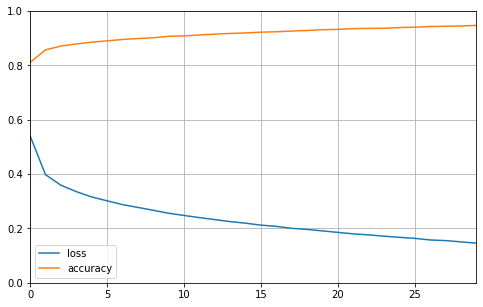

In [32]:
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show

## 8.切出驗證集，來確定是否overfitting

In [33]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [34]:
x_train = x_train/255
x_test = x_test/255

In [35]:
x_valid, x_train = x_train[:5000], x_train[5000:] #因為前面已經除以過255，所以這邊不用除
y_valid, y_train = y_train[:5000], y_train[5000:]

In [36]:
class_names = ['T-shirt/top', "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
class_names[y_train[1996]]

'Ankle boot'

In [37]:
# check answers
y_train[1996]

9

In [38]:
model_2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation='softmax')
])

In [39]:
# Error
#weights, biases = model.get_weights

In [40]:
model_2.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

#### 放入驗證集

In [41]:
history_2 = model_2.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 72us/step - loss: 0.5481 - accuracy: 0.8069 - val_loss: 0.4427 - val_accuracy: 0.8430
Epoch 2/30
55000/55000 [==============================] - 4s 72us/step - loss: 0.4045 - accuracy: 0.8559 - val_loss: 0.4227 - val_accuracy: 0.8484
Epoch 3/30
55000/55000 [==============================] - 4s 70us/step - loss: 0.3632 - accuracy: 0.8699 - val_loss: 0.3605 - val_accuracy: 0.8704
Epoch 4/30
55000/55000 [==============================] - 4s 72us/step - loss: 0.3391 - accuracy: 0.8758 - val_loss: 0.3634 - val_accuracy: 0.8676
Epoch 5/30
55000/55000 [==============================] - 4s 76us/step - loss: 0.3197 - accuracy: 0.8855 - val_loss: 0.3243 - val_accuracy: 0.8876
Epoch 6/30
55000/55000 [==============================] - 5s 87us/step - loss: 0.3043 - accuracy: 0.8896 - val_loss: 0.3252 - val_accuracy: 0.8860
Epoch 7/30
55000/55000 [==============================] - 4s 78us/ste

<function matplotlib.pyplot.show(*args, **kw)>

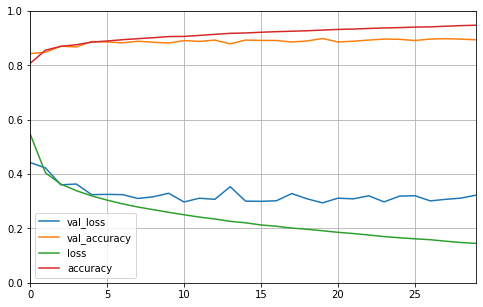

In [42]:
# Learning Curve
import pandas as pd

pd.DataFrame(history_2.history).plot(figsize=(8, 5))
plt.grid(True) # plt.grid(True): 用來顯示網格
plt.gca().set_ylim(0, 1) #plt.gca(): 得到當前的 axes
plt.show

### 結論: 測試集和驗證集的accuracy 有些差異，有些微overfitting

In [43]:
model_2.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 31us/step


[0.6039241646766662, 0.8632000088691711]

## 9.Make Predictions

#### 使用模型的predict()方法对新的实例进行预测

In [44]:
x_new = x_test[:3]
y_proba = model.predict(x_new)
y_proba.round(2)

array([[0.02, 0.01, 0.03, 0.02, 0.03, 0.05, 0.02, 0.32, 0.02, 0.48],
       [0.04, 0.  , 0.86, 0.  , 0.05, 0.  , 0.03, 0.  , 0.  , 0.  ],
       [0.01, 0.96, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [45]:
y_pred = model.predict_classes(x_new)
y_pred #尷尬，與y_new不同

array([9, 2, 1], dtype=int64)

In [46]:
import numpy as np
np.array(class_names)[y_pred] #classify all three images correctly

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [47]:
# check 
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

## 10.Saving and Restorning a Model

In [68]:
model_2.save("my_keras_model_2.h5") #腳本存在資料夾

#### Loading the model

In [69]:
model_2 = keras.models.load_model("my_keras_model_2.h5")

## 11.Using Callbacks (修正Overfitting問題)

In [64]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train/255
x_test = x_test/255

x_valid, x_train = x_train[:5000], x_train[5000:] #因為前面已經除以過255，所以這邊不用除
y_valid, y_train = y_train[:5000], y_train[5000:]

In [65]:
model_3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation='softmax')
])

model_3.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

model_3.save("my_keras_model_3.h5")

In [66]:
#build and compile the model
# ModelCheckpoint: saves checkpoints of your model at regular intervals
# not to worry overfitting
# a simple way to use "early stopping"
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model_3.h5", save_best_only=True)
history_3 = model_3.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid), callbacks=[checkpoint_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 4s 65us/step - loss: 0.5449 - accuracy: 0.8077 - val_loss: 0.4046 - val_accuracy: 0.8550
Epoch 2/20
55000/55000 [==============================] - 4s 71us/step - loss: 0.4024 - accuracy: 0.8563 - val_loss: 0.3836 - val_accuracy: 0.8652
Epoch 3/20
55000/55000 [==============================] - 4s 69us/step - loss: 0.3636 - accuracy: 0.8677 - val_loss: 0.3537 - val_accuracy: 0.8716
Epoch 4/20
55000/55000 [==============================] - 3s 63us/step - loss: 0.3378 - accuracy: 0.8770 - val_loss: 0.3375 - val_accuracy: 0.8810
Epoch 5/20
55000/55000 [==============================] - 4s 74us/step - loss: 0.3195 - accuracy: 0.8840 - val_loss: 0.3367 - val_accuracy: 0.8784
Epoch 6/20
55000/55000 [==============================] - 5s 82us/step - loss: 0.3038 - accuracy: 0.8899 - val_loss: 0.3182 - val_accuracy: 0.8828
Epoch 7/20
55000/55000 [==============================] - 4s 81us/ste

<function matplotlib.pyplot.show(*args, **kw)>

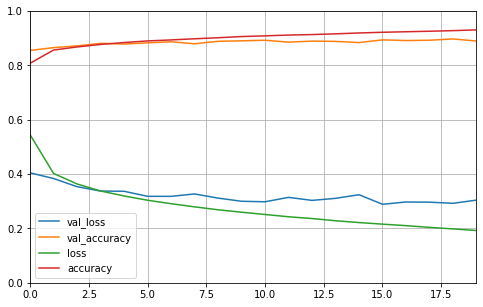

In [67]:
# Learning Curve
import pandas as pd

pd.DataFrame(history_3.history).plot(figsize=(8, 5))
plt.grid(True) # plt.grid(True): 用來顯示網格
plt.gca().set_ylim(0, 1) #plt.gca(): 得到當前的 axes
plt.show

### EarlyStopping (另一個方法解決overfitting)
can set a large value since training will stop autimatically when there is no progress

In [72]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train/255
x_test = x_test/255

x_valid, x_train = x_train[:5000], x_train[5000:] #因為前面已經除以過255，所以這邊不用除
y_valid, y_train = y_train[:5000], y_train[5000:]

model_4 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation='softmax')
])

model_4.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

model_4.save("my_keras_model_4.h5")

In [75]:
model_4.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_17 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_18 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [73]:
earlystopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history_4 = model_4.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid), callbacks=[checkpoint_cb, earlystopping_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 4s 73us/step - loss: 0.5506 - accuracy: 0.8075 - val_loss: 0.4508 - val_accuracy: 0.8416
Epoch 2/100
55000/55000 [==============================] - 4s 66us/step - loss: 0.4064 - accuracy: 0.8548 - val_loss: 0.3731 - val_accuracy: 0.8642
Epoch 3/100
55000/55000 [==============================] - 4s 68us/step - loss: 0.3655 - accuracy: 0.8681 - val_loss: 0.3580 - val_accuracy: 0.8700
Epoch 4/100
55000/55000 [==============================] - 4s 76us/step - loss: 0.3388 - accuracy: 0.8761 - val_loss: 0.3355 - val_accuracy: 0.8774
Epoch 5/100
55000/55000 [==============================] - 4s 77us/step - loss: 0.3203 - accuracy: 0.8848 - val_loss: 0.3512 - val_accuracy: 0.8748
Epoch 6/100
55000/55000 [==============================] - 4s 78us/step - loss: 0.3041 - accuracy: 0.8888 - val_loss: 0.3188 - val_accuracy: 0.8878
Epoch 7/100
55000/55000 [==============================] - 4s 7

<function matplotlib.pyplot.show(*args, **kw)>

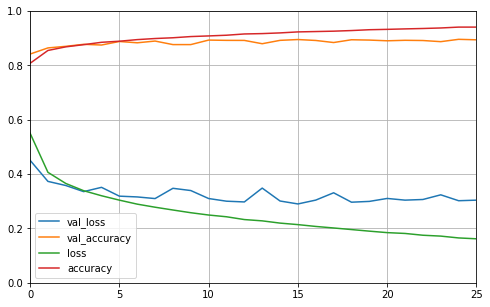

In [74]:
# Learning Curve
import pandas as pd

pd.DataFrame(history_4.history).plot(figsize=(8, 5))
plt.grid(True) # plt.grid(True): 用來顯示網格
plt.gca().set_ylim(0, 1) #plt.gca(): 得到當前的 axes
plt.show

#### 以上兩種修正結果都不甚理想

### Auxiliary Output for Regularization (p308) 略

### Avoid Overfitting Through Regularization
functools.partial() function (p357)

In [87]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train/255
x_test = x_test/255

x_valid, x_train = x_train[:5000], x_train[5000:] #因為前面已經除以過255，所以這邊不用除
y_valid, y_train = y_train[:5000], y_train[5000:]

In [88]:
# l2 Regularization
# l1 Regularization: keras.regularizers.l2(0.01) #0.01為 regularization factor
# both l1 and l2 Regularization: keras.regularizers.l1_l2()
from functools import partial

RegularizedDense = partial(keras.layers.Dense,
                           activation = "elu",
                           kernel_initializer = "he_normal",
                           kernel_regularizer = keras.regularizers.l2(0.01))

model_5 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation='softmax',
                    kernel_initializer = "glorot_uniform")
])

model_5.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

#model_5.save("my_keras_model_5.h5")

In [89]:
history_5 = model_5.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 5s 87us/step - loss: 6.6762 - accuracy: 0.7783 - val_loss: 4.8204 - val_accuracy: 0.8178
Epoch 2/20
55000/55000 [==============================] - 5s 83us/step - loss: 3.7281 - accuracy: 0.8208 - val_loss: 2.8450 - val_accuracy: 0.8306
Epoch 3/20
55000/55000 [==============================] - 5s 83us/step - loss: 2.3052 - accuracy: 0.8230 - val_loss: 1.8584 - val_accuracy: 0.8316
Epoch 4/20
55000/55000 [==============================] - 5s 91us/step - loss: 1.5940 - accuracy: 0.8236 - val_loss: 1.3626 - val_accuracy: 0.8308
Epoch 5/20
55000/55000 [==============================] - 5s 97us/step - loss: 1.2359 - accuracy: 0.8238 - val_loss: 1.1086 - val_accuracy: 0.8338
Epoch 6/20
55000/55000 [==============================] - 5s 97us/step - loss: 1.0546 - accuracy: 0.8236 - val_loss: 0.9965 - val_accuracy: 0.8282
Epoch 7/20
55000/55000 [==============================] - 5s 95us/ste

<function matplotlib.pyplot.show(*args, **kw)>

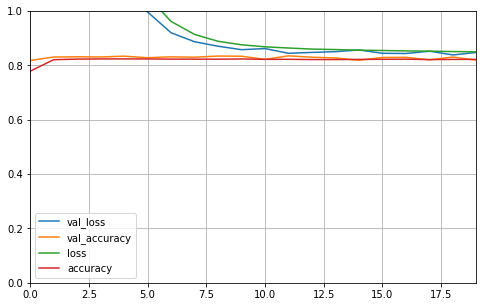

In [90]:
# Learning Curve
import pandas as pd

pd.DataFrame(history_5.history).plot(figsize=(8, 5))
plt.grid(True) # plt.grid(True): 用來顯示網格
plt.gca().set_ylim(0, 1) #plt.gca(): 得到當前的 axes
plt.show

#### 看accuracy 的比較，可發現沒發生 overfitting

### Avoid Overfitting Through Dropout

In [95]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train/255
x_test = x_test/255

x_valid, x_train = x_train[:5000], x_train[5000:] #因為前面已經除以過255，所以這邊不用除
y_valid, y_train = y_train[:5000], y_train[5000:]

model_6 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation='elu', kernel_initializer = "he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation='elu', kernel_initializer = "he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation='softmax')
])

model_6.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [106]:
history_6 = model_6.fit(x_train, y_train, epochs=20, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/20
55000/55000 [==============================] - 6s 108us/step - loss: 0.7771 - accuracy: 0.7229 - val_loss: 0.5359 - val_accuracy: 0.8066
Epoch 2/20
55000/55000 [==============================] - 5s 95us/step - loss: 0.5791 - accuracy: 0.7906 - val_loss: 0.4640 - val_accuracy: 0.8378
Epoch 3/20
55000/55000 [==============================] - 5s 92us/step - loss: 0.5374 - accuracy: 0.8061 - val_loss: 0.4368 - val_accuracy: 0.8474
Epoch 4/20
55000/55000 [==============================] - 5s 99us/step - loss: 0.5150 - accuracy: 0.8142 - val_loss: 0.4251 - val_accuracy: 0.8470
Epoch 5/20
55000/55000 [==============================] - 6s 109us/step - loss: 0.5004 - accuracy: 0.8188 - val_loss: 0.4106 - val_accuracy: 0.8562
Epoch 6/20
55000/55000 [==============================] - 8s 141us/step - loss: 0.4851 - accuracy: 0.8243 - val_loss: 0.4051 - val_accuracy: 0.8564
Epoch 7/20
55000/55000 [==============================] - 6s 107us

<function matplotlib.pyplot.show(*args, **kw)>

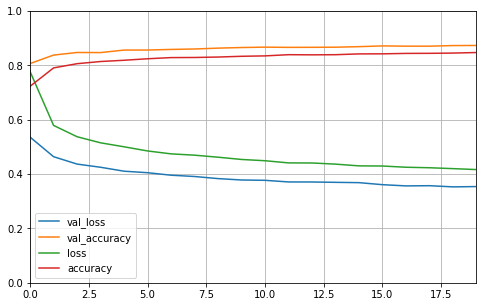

In [107]:
# Learning Curve
import pandas as pd

pd.DataFrame(history_6.history).plot(figsize=(8, 5))
plt.grid(True) # plt.grid(True): 用來顯示網格
plt.gca().set_ylim(0, 1) #plt.gca(): 得到當前的 axes
plt.show

### 效果較差，應該可在繼續訓練